In [3]:
from matplotlib import gridspec
import matplotlib.pyplot as plt
import numpy as np

from romgw.config.env import PROJECT_ROOT, COMMON_TIME
from romgw.maths.rb import gram_matrix
from romgw.typing.core import RealArray, BBHSpinType, ModeType, ComponentType
from romgw.typing.utils import validate_literal
from romgw.waveform.base import ComponentWaveform, FullWaveform
from romgw.waveform.dataset import ComponentWaveformDataset, FullWaveformDataset

In [ ]:
# def visualise_rb(
#     bbh_spin: BBHSpinType,
#     mode: ModeType,
#     component: ComponentType,
#     verbose:bool = False,
# ) -> None:
#     """Look into the waveforms generated by the fiducial model."""
#     # ----- Validate args -----
#     bbh_spin = validate_literal(bbh_spin, BBHSpinType)
#     mode = validate_literal(mode, ModeType)
#     component = validate_literal(component, ComponentType)

#     # ----- Notebook data root -----
#     data_dir = PROJECT_ROOT / "data" / bbh_spin / "train"

#     # ----- Load rb elements -----
#     rb_dir = data_dir / mode / component / "reduced_basis"
#     elements = ComponentWaveformDataset.from_directory(rb_dir / "elements",
#                                                        component=component)
#     m = len(elements)
#     errs = np.load(rb_dir / "rb_greedy_errors.npy", allow_pickle=False)
#     if verbose:
#         print(f"{elements=}")

#     # ----- Visualise n waveforms -----
#     if verbose:
#         fig = plt.figure(figsize=(12, 3 + (m // 2) / 3))
#         spec = gridspec.GridSpec(
#             ncols=1,
#             nrows=2,
#             height_ratios=(3, (m // 2) / 3),
#             left=0,
#             right=1,
#             hspace=0.1
#         )
#         ax = fig.add_subplot(spec[0])
#     else:
#         fig, ax = plt.subplots(1, 1, figsize=(12, 3))
    
#     for e in elements:
#         ax_elem.plot(COMMON_TIME, e, label=e.params)
        
#     ax_elem.set_xlim(-5000, 250)
#     ax_elem.set_xlabel("time")
#     ax_elem.set_ylabel(f"{component}")
#     ax_elem.set_title(f"{m} {component} rb elements ({bbh_spin=}, {mode=})")

#     if verbose:
#         axl = fig.add_subplot(spec[1])
#         axl.set_axis_off()
#         handles, labels = ax_elem.get_legend_handles_labels()
#         axl.legend(handles, labels, loc='center', ncol=2, framealpha=0)

#     plt.show()

In [46]:
def visualise_rb(
    bbh_spin: BBHSpinType,
    mode: ModeType,
    component: ComponentType,
    verbose:bool = False,
    show_element_params: bool = False,
) -> None:
    """Look into the waveforms generated by the fiducial model."""
    # ----- Validate args -----
    bbh_spin = validate_literal(bbh_spin, BBHSpinType)
    mode = validate_literal(mode, ModeType)
    component = validate_literal(component, ComponentType)

    # ----- Notebook data root -----
    data_dir = PROJECT_ROOT / "data" / bbh_spin / "train"

    # ----- Load rb elements -----
    rb_dir = data_dir / mode / component / "reduced_basis"
    elements = ComponentWaveformDataset.from_directory(rb_dir / "elements",
                                                       component=component)
    m = len(elements)
    errs = np.load(rb_dir / "rb_greedy_errors.npy", allow_pickle=False)
    if verbose:
        print(f"{elements=}")

        G = gram_matrix(elements, COMMON_TIME)
        print(f"Gram matrix:")
        diag_mean = float(np.diagonal(G).mean())
        off_diag_mean = (float(np.sum(np.sum(G))) - (len(G) * diag_mean)) / (G.size - len(G))
        print(f">>> diagonal mean: {diag_mean:.6e}\n"
              f">>> off-diag mean: {off_diag_mean:.6e}")


    # ----- Visualise n waveforms -----
    fig = plt.figure(figsize=(12, 3))
    spec = gridspec.GridSpec(
        ncols=2,
        nrows=1,
        width_ratios=(5, 3),
        left=0,
        right=1,
        bottom=0,
        top=1,
        wspace=0.2
    )
    ax_elem = fig.add_subplot(spec[0])
    ax_errs = fig.add_subplot(spec[1])
    
    for e in elements:
        ax_elem.plot(COMMON_TIME, e, label=e.params)
    
    ax_errs.semilogy(range(len(errs)), errs, alpha=0.5)
    ax_errs.scatter(range(len(errs)), errs, marker='x', s=10)
    tolerance = 1e-12 if component == "amplitude" else 1e-10
    ax_errs.hlines(tolerance, *ax_errs.get_xlim(),
                   linestyle='--', alpha=0.5, color='r')
        
    ax_elem.set_xlim(-5000, 250)
    ax_elem.set_xlabel("time")
    ax_elem.set_ylabel(f"{component}")
    ax_elem.set_title(f"{m} {component} rb elements ({bbh_spin=}, {mode=})")

    ax_errs.set_xlim(0, len(errs))
    ax_errs.set_xlabel("m")
    ax_errs.set_ylabel(f"greedy error")
    ax_errs.set_title(f"greedy errors for {component} rb")

    plt.show()

    if show_element_params:
        for e in elements:
            print(e.params)

Waveforms loaded.                                                               
elements=<ComponentWaveformDataset[phase](n=102, shape=(5250,))>
Gram matrix:
>>> diagonal mean: 1.000000e+00
>>> off-diag mean: 1.938160e-10


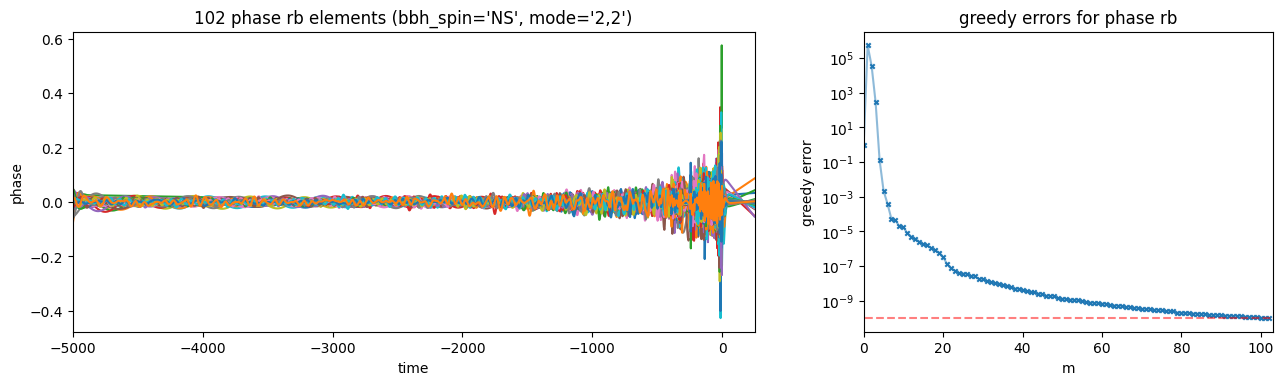

PhysicalParams(q=9.889468, chi1=[ 0.       0.       0.       ], chi2=[ 0.       0.       0.       ])
PhysicalParams(q=1.395600, chi1=[ 0.       0.       0.       ], chi2=[ 0.       0.       0.       ])
PhysicalParams(q=1.392537, chi1=[ 0.       0.       0.       ], chi2=[ 0.       0.       0.       ])
PhysicalParams(q=4.345770, chi1=[ 0.       0.       0.       ], chi2=[ 0.       0.       0.       ])
PhysicalParams(q=2.324905, chi1=[ 0.       0.       0.       ], chi2=[ 0.       0.       0.       ])
PhysicalParams(q=8.013363, chi1=[ 0.       0.       0.       ], chi2=[ 0.       0.       0.       ])
PhysicalParams(q=2.981489, chi1=[ 0.       0.       0.       ], chi2=[ 0.       0.       0.       ])
PhysicalParams(q=2.089940, chi1=[ 0.       0.       0.       ], chi2=[ 0.       0.       0.       ])
PhysicalParams(q=4.920354, chi1=[ 0.       0.       0.       ], chi2=[ 0.       0.       0.       ])
PhysicalParams(q=3.169474, chi1=[ 0.       0.       0.       ], chi2=[ 0.       0.       0.

In [47]:
visualise_rb(
    bbh_spin="NS",
    mode="2,2",
    component="phase",
    verbose=True,
    show_element_params=True,
)